<h2>Exercise set 2 - Pandas Module</h2>

In [639]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Question 1: Data from Loans.csv</h2>

In [640]:
# Read the laons.csv file
df = pd.read_csv("LOANS.csv")

In [641]:
# Remove the customer ID column
df = df.drop("Customer ID", axis=1)

In [642]:
# Print the head of the data, way 1
print(df.head())

                                Loan ID Loan Status  Current Loan Amount  \
0  14dd8831-6af5-400b-83ec-68e61888a048  Fully Paid             445412.0   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  Fully Paid             262328.0   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  Fully Paid           99999999.0   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  Fully Paid             347666.0   
4  d4062e70-befa-4995-8643-a0de73938182  Fully Paid             176220.0   

         Term  Credit Score  Annual Income Years in current job  \
0  Short Term         709.0      1167493.0              8 years   
1  Short Term           NaN            NaN            10+ years   
2  Short Term         741.0      2231892.0              8 years   
3   Long Term         721.0       806949.0              3 years   
4  Short Term           NaN            NaN              5 years   

  Home Ownership             Purpose  Monthly Debt  Years of Credit History  \
0  Home Mortgage   Home Improvements       5214.74           

In [643]:
# Print the head of data, way 2 (I prefer this one)
df.head()

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [644]:
# Remove rows from data that have larger loan than  99999999
df = df[df["Current Loan Amount"] < 99999999].sort_values(by='Current Loan Amount', ascending=True)

# Display the new df
df


,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
87741,7fd15008-5365-4385-bace-c093b1837555,Fully Paid,10802.0,Short Term,NaN,NaN,< 1 year,HaveMortgage,Take a Trip,373.73,27.4,8.0,3.0,0.0,817.0,25696.0,NaN,0.0
13338,20c4e560-e543-486a-a010-12bcdbc1b3ff,Fully Paid,11242.0,Short Term,747.0,349391.0,< 1 year,Rent,other,1243.17,12.7,0.0,4.0,0.0,0.0,0.0,NaN,0.0
19847,50118373-dd2c-402d-918b-a9e49d921eac,Fully Paid,15422.0,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
79169,50118373-dd2c-402d-918b-a9e49d921eac,Fully Paid,15422.0,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
79712,8e479ae7-12cc-4a76-bb92-ae6effa0b20c,Fully Paid,21098.0,Short Term,NaN,NaN,1 year,Rent,other,8231.56,20.6,0.0,8.0,0.0,43054.0,503646.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94523,12092f92-171b-4d9b-89ae-82ca88bfc26b,Fully Paid,789184.0,Short Term,744.0,2142041.0,2 years,Home Mortgage,Debt Consolidation,15351.24,21.2,NaN,10.0,0.0,356725.0,626780.0,0.0,0.0
55736,8d59aa00-d111-4439-9b32-82cc5ab5b940,Fully Paid,789184.0,Long Term,716.0,1596798.0,3 years,Home Mortgage,Debt Consolidation,44710.23,28.5,NaN,15.0,0.0,921139.0,1760044.0,0.0,0.0
42195,b7923e12-395b-49d6-97ee-ca0ed25b65c2,Fully Paid,789250.0,Short Term,721.0,8054480.0,6 years,Home Mortgage,Debt Consolidation,114105.07,31.4,2.0,21.0,0.0,1826147.0,2405568.0,0.0,0.0
82002,770ca5a2-3b53-4c8c-a238-55cf72f66b82,Charged Off,789250.0,Short Term,NaN,NaN,2 years,Home Mortgage,Debt Consolidation,17267.96,21.0,NaN,8.0,0.0,402838.0,767184.0,0.0,0.0


In [645]:
# Use reset_index to reset index and for more understandable view
df = df.reset_index(drop=True)

# Display the df with reset index
df

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,7fd15008-5365-4385-bace-c093b1837555,Fully Paid,10802.0,Short Term,NaN,NaN,< 1 year,HaveMortgage,Take a Trip,373.73,27.4,8.0,3.0,0.0,817.0,25696.0,NaN,0.0
1,20c4e560-e543-486a-a010-12bcdbc1b3ff,Fully Paid,11242.0,Short Term,747.0,349391.0,< 1 year,Rent,other,1243.17,12.7,0.0,4.0,0.0,0.0,0.0,NaN,0.0
2,50118373-dd2c-402d-918b-a9e49d921eac,Fully Paid,15422.0,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
3,50118373-dd2c-402d-918b-a9e49d921eac,Fully Paid,15422.0,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
4,8e479ae7-12cc-4a76-bb92-ae6effa0b20c,Fully Paid,21098.0,Short Term,NaN,NaN,1 year,Rent,other,8231.56,20.6,0.0,8.0,0.0,43054.0,503646.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88511,12092f92-171b-4d9b-89ae-82ca88bfc26b,Fully Paid,789184.0,Short Term,744.0,2142041.0,2 years,Home Mortgage,Debt Consolidation,15351.24,21.2,NaN,10.0,0.0,356725.0,626780.0,0.0,0.0
88512,8d59aa00-d111-4439-9b32-82cc5ab5b940,Fully Paid,789184.0,Long Term,716.0,1596798.0,3 years,Home Mortgage,Debt Consolidation,44710.23,28.5,NaN,15.0,0.0,921139.0,1760044.0,0.0,0.0
88513,b7923e12-395b-49d6-97ee-ca0ed25b65c2,Fully Paid,789250.0,Short Term,721.0,8054480.0,6 years,Home Mortgage,Debt Consolidation,114105.07,31.4,2.0,21.0,0.0,1826147.0,2405568.0,0.0,0.0
88514,770ca5a2-3b53-4c8c-a238-55cf72f66b82,Charged Off,789250.0,Short Term,NaN,NaN,2 years,Home Mortgage,Debt Consolidation,17267.96,21.0,NaN,8.0,0.0,402838.0,767184.0,0.0,0.0


In [646]:
# Check if there is any na (missing values) within 'Annual Income Column
df['Annual Income'].isna().sum()

19154

In [647]:
# Remove the rows that have annual income as Nan
df = df.dropna(subset=["Annual Income"])

# Display the dataframe
df

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,20c4e560-e543-486a-a010-12bcdbc1b3ff,Fully Paid,11242.0,Short Term,747.0,349391.0,< 1 year,Rent,other,1243.17,12.7,0.0,4.0,0.0,0.0,0.0,NaN,0.0
2,50118373-dd2c-402d-918b-a9e49d921eac,Fully Paid,15422.0,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
3,50118373-dd2c-402d-918b-a9e49d921eac,Fully Paid,15422.0,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
5,024bf769-1d1b-4af9-895e-e96aa07e9e14,Charged Off,21450.0,Short Term,694.0,1132381.0,10+ years,HaveMortgage,Take a Trip,21987.18,27.2,3.0,12.0,0.0,339511.0,568898.0,0.0,0.0
6,95ee0fe0-7e24-4b6d-bd08-797164f72ceb,Fully Paid,21450.0,Short Term,713.0,463182.0,6 years,Rent,Medical Bills,13161.87,7.1,NaN,10.0,0.0,83657.0,160886.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88510,f95fe414-2e62-4d41-82be-e162e5715fef,Fully Paid,789184.0,Long Term,713.0,2239416.0,10+ years,Home Mortgage,Debt Consolidation,44228.20,17.3,NaN,17.0,0.0,632263.0,1247180.0,0.0,0.0
88511,12092f92-171b-4d9b-89ae-82ca88bfc26b,Fully Paid,789184.0,Short Term,744.0,2142041.0,2 years,Home Mortgage,Debt Consolidation,15351.24,21.2,NaN,10.0,0.0,356725.0,626780.0,0.0,0.0
88512,8d59aa00-d111-4439-9b32-82cc5ab5b940,Fully Paid,789184.0,Long Term,716.0,1596798.0,3 years,Home Mortgage,Debt Consolidation,44710.23,28.5,NaN,15.0,0.0,921139.0,1760044.0,0.0,0.0
88513,b7923e12-395b-49d6-97ee-ca0ed25b65c2,Fully Paid,789250.0,Short Term,721.0,8054480.0,6 years,Home Mortgage,Debt Consolidation,114105.07,31.4,2.0,21.0,0.0,1826147.0,2405568.0,0.0,0.0


In [648]:
# Calculate the average income
average_income = df["Annual Income"].mean()

# Replace NaN annual income with the average income
df['Annual Income'].fillna(df["Annual Income"].mean(), inplace=True)
df['Annual Income']

C:\Users\Archoste\AppData\Local\Temp\ipykernel_4972\3063876226.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Annual Income'].fillna(df["Annual Income"].mean(), inplace=True)
C:\Users\Archoste\AppData\Local\Temp\ipykernel_4972\3063876226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual Income'].fillna(df["Annual Income"]

1         349391.0
2         361760.0
3         361760.0
5        1132381.0
6         463182.0
           ...    
88510    2239416.0
88511    2142041.0
88512    1596798.0
88513    8054480.0
88515    1752750.0
Name: Annual Income, Length: 69362, dtype: float64

In [649]:
# Check if imputation method worked
df['Annual Income'].isna().sum()

0

In [650]:
# Find the average Current loan amount
average_current_loan_amount =  df["Current Loan Amount"].mean()
print(f"The average current loan amount is: {average_current_loan_amount}")

The average current loan amount is: 314293.1817998328


In [651]:
# Get the  highest and lowest annual income in the dataset
highest_annual_income = df['Annual Income'].max()
lowest_annual_income = df['Annual Income'].min()
print('Highest Annual Income:', highest_annual_income)
print('Lowest Annual Income:', lowest_annual_income)

Highest Annual Income: 165557393.0
Lowest Annual Income: 76627.0


In [652]:
# Get the Home Ownership value of the Loan ID = bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d
home_ownership_value = df[df['Loan ID'] == 'bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d']['Home Ownership'].iloc[0]
print('Home Ownership:', home_ownership_value)

Home Ownership: Own Home


In [653]:
# Create a field called Actual Annual Income
df["Actual Annual Income"] = df["Annual Income"] - 12 * df["Monthly Debt"]

C:\Users\Archoste\AppData\Local\Temp\ipykernel_4972\940587448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Actual Annual Income"] = df["Annual Income"] - 12 * df["Monthly Debt"]


In [654]:
# Get the Actual Annual Income of the loan 
Actual_Annual_Income = df[df["Loan ID"]=="76fa89b9-e6a8-49af-afa1-8151315aba8e"]["Actual Annual Income"].iloc[0]
print(f"Actual Annual Income:{Actual_Annual_Income}")

Actual Annual Income:674234.76


In [655]:
# Get the Loan ID of the loan with the smallest Actual Annual Income
smallest_actual_income_id = df[df['Actual Annual Income'] == df['Actual Annual Income'].min()]['Loan ID'].iloc[0]
print('Loan ID with smallest Actual Annual Income:', smallest_actual_income_id)


Loan ID with smallest Actual Annual Income: fdda52f3-bbfa-45da-80b5-2bd9b68638ed


In [656]:
# Number of Long-term Loans
long_term_loans = df[df["Term"]=="Long Term"].shape[0]
print(f"Number of Long-term loans: {long_term_loans}")


Number of Long-term loans: 20789


In [657]:
# Loaners with more than one bankrupcy
multiple_bankrupcy = df[df["Bankruptcies"]> 1].shape[0]
print(f"Loaners with multiple bankruptcies: {multiple_bankrupcy}")

Loaners with multiple bankruptcies: 372


In [658]:
# Number of short term loans for the Home improvements
home_improvement_short_term_loan = df[(df["Term"]=="Short Term") & (df["Purpose"]=="Home Improvements")].shape[0]
print(f"Number of short term loan for the home improvements: {home_improvement_short_term_loan}")

Number of short term loan for the home improvements: 2657


In [659]:
# number of Unique loan purposes
# .unique() - gives us unique values
# .nunique() - gives the total number of unique values
unique_loan_purposes = df["Purpose"].unique()
number_unique_loan_purposes = df["Purpose"].nunique()
print(f"Unique loan purposes: {unique_loan_purposes}")
print(f"Number of unique loan purposes: {number_unique_loan_purposes}")

Unique loan purposes: ['other' 'Debt Consolidation' 'Take a Trip' 'Medical Bills' 'Other'
 'Home Improvements' 'major_purchase' 'Buy a Car' 'vacation' 'moving'
 'wedding' 'Business Loan' 'Buy House' 'Educational Expenses'
 'small_business' 'renewable_energy']
Number of unique loan purposes: 16


In [660]:
# three common loan purposes
three_common_loan_purposes = df["Purpose"].value_counts().head(3)
print(f"The three most common Loan purposes are: {three_common_loan_purposes}")

The three most common Loan purposes are: Purpose
Debt Consolidation    54268
other                  4389
Home Improvements      4005
Name: count, dtype: int64


In [661]:
# Correlation problem using .corr()
correlation1 = df["Annual Income"].corr(df["Number of Open Accounts"])
correlation2 = df["Number of Credit Problems"].corr(df["Bankruptcies"])
print(f"Correlation between Annual Income and Number of Open Accounts: {correlation1}")
print(f"Correlation between Number of credit problems and Bankruptices: {correlation2}")

Correlation between Annual Income and Number of Open Accounts: 0.14292913707559446
Correlation between Number of credit problems and Bankruptices: 0.7474549235349058


This informs us that correlation between Annual Income & Number of Loans columns is quite low. This could be caused by higher income inviduals having several accounts open at this bank.

Other hand, correlation between Number of Credit Problems and Bankruptcies is relatively high, this could be caused by people who have income problems being more prone for filing more bankruptcies.



<h2>Question 2: Data from purchases.csv</h2>

In [662]:
df = pd.read_csv("purchases.csv")

In [663]:
# Display the head of the dataframe
df.head()

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,09/05/2012,08/31/2012,2012-2013,NaN,4500149558,NaN,NON-IT Goods,Formal Competitive,"Corrections and Rehabilitation, Department of",48199.0,...,50405625,50405625.0,Jalapeno peppers,50405600.0,Peppers,50400000.0,Fresh vegetables,50000000.0,Food Beverage and Tobacco Products,"93706\n(36.675079, -119.865393)"
1,10/18/2012,10/18/2012,2012-2013,NaN,4500156192,NaN,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",1327540.0,...,50301541,50301541.0,Ida red apples,50301500.0,Apples,50300000.0,Fresh fruits,50000000.0,Food Beverage and Tobacco Products,"91360\n(34.210392, -118.874313)"
2,10/17/2012,10/17/2012,2012-2013,NaN,4500156124,NaN,NON-IT Goods,Fair and Reasonable,Correctional Health Care Services,45803.0,...,55101506,55101506.0,Magazines,55101500.0,Printed publications,55100000.0,Printed media,55000000.0,Published Products,"95827\n(38.563097, -121.328511)"
3,10/30/2012,10/24/2012,2012-2013,NaN,S2556056,NaN,NON-IT Goods,Informal Competitive,"Parks & Recreation, Department of",1746707.0,...,10121505,10121505.0,Hay,10121500.0,Livestock feed,10120000.0,Animal feed,10000000.0,Live Plant and Animal Material and Accessories...,NaN
4,11/14/2012,11/14/2012,2012-2013,NaN,4500159228,NaN,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",1065902.0,...,50201706,50201706.0,Coffee,50201700.0,Coffee and tea,50200000.0,Beverages,50000000.0,Food Beverage and Tobacco Products,"95696\n(38.43, -122.02)"


In [664]:
# Total price sum for the PON 018H2015
total_price_PON = df[df["Purchase Order Number"]== "018H2015"]["Total Price"].sum()
print(f"The total price for the purchase order number is: {round(total_price_PON,2)}")

The total price for the purchase order number is: 1245.04


In [665]:
# Name and description of the item with PON 3176273
item = df[df["Purchase Order Number"]== "3176273"][["Item Name","Item Description"]].iloc[0]
print(f"The name and description of the item is:")
print(f"{item}")

The name and description of the item is:
Item Name               PC Desktop
Item Description    HP Prodesk 600
Name: 103, dtype: object


In [666]:
# Rows of purchased data happened during the year 2013
purchase_2013_data = df[df["Purchase Date"].str.contains("2013")].shape[0]
print(f"The purchase data in 2013 is: {purchase_2013_data} ")

The purchase data in 2013 is: 34024 


In [667]:
# Five most common Departments in the data
five_common_departments = df["Department Name"].value_counts().head(5)
print("Five most common Departments:")
print(f"{five_common_departments}")


Five most common Departments:
Department Name
Corrections and Rehabilitation, Department of    10891
Correctional Health Care Services                 6593
Water Resources, Department of                    4582
Forestry and Fire Protection, Department of       4526
State Hospitals, Department of                    4281
Name: count, dtype: int64


In [668]:
# Extra Task: Top three Department using most money
top_three_department = df.groupby("Department Name")["Total Price"].sum().head(3)
print(f"The top three department: {top_three_department}")

The top three department: Department Name
Administrative Law, Office of             50000.00
African American Museum, California      103122.44
Aging, Department of                   82834987.10
Name: Total Price, dtype: float64


In [669]:
# Sort the data by Department name
sorted_department_name = df.sort_values("Department Name")
print(sorted_department_name)

      Creation Date Purchase Date Fiscal Year LPA Number  \
6        11/30/2012    06/15/2012   2012-2013        NaN   
519      11/30/2012    06/15/2012   2012-2013        NaN   
20018    11/30/2012    06/15/2012   2012-2013        NaN   
31381    02/21/2013    03/20/2013   2012-2013        NaN   
27820    01/03/2013    02/14/2011   2012-2013        NaN   
...             ...           ...         ...        ...   
24826    12/17/2012    12/15/2012   2012-2013        NaN   
49068    06/13/2013    06/12/2013   2012-2013        NaN   
49069    03/26/2014    03/25/2014   2013-2014        NaN   
49057    06/13/2013    06/12/2013   2012-2013        NaN   
44469    05/07/2013    05/01/2013   2012-2013        NaN   

      Purchase Order Number  Requisition Number Acquisition Type  \
6                   11OAL07                 NaN     NON-IT Goods   
519                 11OAL09                 NaN     NON-IT Goods   
20018               11OAL10                 NaN     NON-IT Goods   
31381  

In [670]:
# Replace the $-sign and convert the value to a float
df["Unit Price"] = df["Unit Price"].str.replace("$", " ").astype(float)

In [671]:
# Smaller extra tasks
# Number of purchases that had price more than 50000$
purchase_over_50000 = df[(df["Acquisition Type"] == "IT Goods") & (df["Total Price"] > 50000)].shape[0]
print(f"The purchase in the IT goods which costs over 50000$ is: {purchase_over_50000} ")

The purchase in the IT goods which costs over 50000$ is: 698 


In [672]:
# Purchases related to IT (IT Goods, IT Services, IT Telecommunications)
it_purchases_count = df[df["Acquisition Type"].str.contains("IT")].shape[0]
print("Number of purchases related to IT:", it_purchases_count)

Number of purchases related to IT: 62657


In [673]:
# Creating a new DataFrame, where we have filtered out purchases that have a Total Price of 0 or less
new_dataframe = df[df['Total Price'] > 0]

In [674]:
# Display the new dataframe
new_dataframe

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,09/05/2012,08/31/2012,2012-2013,NaN,4500149558,NaN,NON-IT Goods,Formal Competitive,"Corrections and Rehabilitation, Department of",48199.0,...,50405625,50405625.0,Jalapeno peppers,50405600.0,Peppers,50400000.0,Fresh vegetables,50000000.0,Food Beverage and Tobacco Products,"93706\n(36.675079, -119.865393)"
1,10/18/2012,10/18/2012,2012-2013,NaN,4500156192,NaN,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",1327540.0,...,50301541,50301541.0,Ida red apples,50301500.0,Apples,50300000.0,Fresh fruits,50000000.0,Food Beverage and Tobacco Products,"91360\n(34.210392, -118.874313)"
2,10/17/2012,10/17/2012,2012-2013,NaN,4500156124,NaN,NON-IT Goods,Fair and Reasonable,Correctional Health Care Services,45803.0,...,55101506,55101506.0,Magazines,55101500.0,Printed publications,55100000.0,Printed media,55000000.0,Published Products,"95827\n(38.563097, -121.328511)"
3,10/30/2012,10/24/2012,2012-2013,NaN,S2556056,NaN,NON-IT Goods,Informal Competitive,"Parks & Recreation, Department of",1746707.0,...,10121505,10121505.0,Hay,10121500.0,Livestock feed,10120000.0,Animal feed,10000000.0,Live Plant and Animal Material and Accessories...,NaN
4,11/14/2012,11/14/2012,2012-2013,NaN,4500159228,NaN,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",1065902.0,...,50201706,50201706.0,Coffee,50201700.0,Coffee and tea,50200000.0,Beverages,50000000.0,Food Beverage and Tobacco Products,"95696\n(38.43, -122.02)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62652,08/22/2013,08/23/2013,2013-2014,1-10-75-60A,S3863002,NaN,NON-IT Goods,Statewide Contract,"Parks & Recreation, Department of",1087660.0,...,44103103,44103103.0,Printer or facsimile toner,44103100.0,Printer and facsimile and photocopier supplies,44100000.0,Office machines and their supplies and accesso...,44000000.0,Office Equipment and Accessories and Supplies,"95814\n(38.580427, -121.494396)"
62653,08/22/2013,08/23/2013,2013-2014,1-10-75-60A,S3863002,NaN,NON-IT Goods,Statewide Contract,"Parks & Recreation, Department of",1087660.0,...,44103103,44103103.0,Printer or facsimile toner,44103100.0,Printer and facsimile and photocopier supplies,44100000.0,Office machines and their supplies and accesso...,44000000.0,Office Equipment and Accessories and Supplies,"95814\n(38.580427, -121.494396)"
62654,08/22/2013,08/23/2013,2013-2014,1-10-75-60A,S3863002,NaN,NON-IT Goods,Statewide Contract,"Parks & Recreation, Department of",1087660.0,...,44103103,44103103.0,Printer or facsimile toner,44103100.0,Printer and facsimile and photocopier supplies,44100000.0,Office machines and their supplies and accesso...,44000000.0,Office Equipment and Accessories and Supplies,"95814\n(38.580427, -121.494396)"
62655,08/24/2013,08/23/2013,2013-2014,NaN,2U3H1109,NaN,NON-IT Services,Emergency Purchase,"Forestry and Fire Protection, Department of",1015235.0,...,76122402,76122402.0,Equipment usage fee,76122400.0,Refuse disposal and treatment fees,76120000.0,Refuse disposal and treatment,76000000.0,Industrial Cleaning Services,"95901\n(39.195356, -121.495425)"


In [675]:
# Using groupby() function
group_purchase_data = df.groupby("Acquisition Type")["Total Price"].agg(['sum','mean'])

In [676]:
# Display the grouped dataframe
group_purchase_data

,sum,mean
Acquisition Type,,
IT Goods,2.134156e+08,2.732245e+04
IT Services,1.156012e+09,6.639928e+05
IT Telecommunications,3.079034e+05,5.131723e+04
NON-IT Goods,1.033865e+09,2.582273e+04
NON-IT Services,3.054246e+10,2.338268e+06


In [677]:
# Acquisition type comparison
largest_sum = group_purchase_data["sum"].nlargest(3)
largest_mean = group_purchase_data["mean"].nlargest(3)
print(f"The largest sum is: {largest_sum}")
print(f"The largest mean is: {largest_mean}")

The largest sum is: Acquisition Type
NON-IT Services    3.054246e+10
IT Services        1.156012e+09
NON-IT Goods       1.033865e+09
Name: sum, dtype: float64
The largest mean is: Acquisition Type
NON-IT Services          2.338268e+06
IT Services              6.639928e+05
IT Telecommunications    5.131723e+04
Name: mean, dtype: float64


<h4>Based on the output, the two acquisition types with the largest sums are "NON-IT Services" and "IT Services," and the two acquisition types with the largest means are "NON-IT Services" and "IT Services."
Therefore, "NON-IT Services" is the acquisition type with the largest sum and mean, and "IT Services" is the acquisition type with the second-largest sum and mean.</h4>

<h2>Question 3: Data from salaries in India CSV</h2>

In [678]:
# Read the csv-file(data_salaries_india.csv)
df = pd.read_csv('SALARIES.csv')

# Display the dataframe
df

,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Axis Bank,Data Scientist,Specialist,3,Bangalore,"₹11,71,687/yr"
1,Globex Digital Solutions,Machine Learning Engineer,Manager,1,Hyderabad,"₹32,57,305/yr"
2,Tempworks Services,Data Scientist,Manager,1,Bangalore,"₹58,11,205/yr"
3,BlueOptima,Machine Learning Engineer,Specialist,2,Bangalore,"₹11,80,965/yr"
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,"₹6,02,930/yr"
...,...,...,...,...,...,...
5122,Rejolut,Machine Learning Engineer,Specialist,1,Mumbai,"₹5,13,690/yr"
5123,Bartleby Technologies,Machine Learning Engineer,Specialist,1,Bangalore,"₹13,09,535/yr"
5124,Clairvolex,Data Scientist,Manager,1,Bangalore,"₹44,99,222/yr"
5125,Piramal Enterprises,Data Analyst,Manager,1,Mumbai,"₹46,12,711/yr"


In [679]:
# Get the columns names
df.columns

Index(['Company Name', 'Job Title', 'Role', 'Salaries Reported', 'Location',
       'Salary'],
      dtype='object')

In [680]:
df.columns

Index(['Company Name', 'Job Title', 'Role', 'Salaries Reported', 'Location',
       'Salary'],
      dtype='object')

In [681]:
# convert all salaries(hourly, monthly) into yearly salary
def yearly_wage(row):
    # the last two characters determine if it's yearly, monthly, hourly
    period = row['Salary'][-2:]
    
    # remove all commas and combine all numbers
    number = int(''.join(filter(str.isdigit, row['Salary'])))
    
    # if it's hourly, the average work hours per year in India is
    # approximately 2117.01. 
    if period == "hr":
        number = int(number * 2117.01)
    elif period == "mo":
        # months to year
        number = int(number * 12)
    
    # return the yearly salary in integer format
    return number

In [682]:
# Remove the Indian rupees sign
df['Salary'] = df['Salary'].str.replace('₹', '' '')

# Display the dataframe
df['Salary']

0       11,71,687/yr
1       32,57,305/yr
2       58,11,205/yr
3       11,80,965/yr
4        6,02,930/yr
            ...     
5122     5,13,690/yr
5123    13,09,535/yr
5124    44,99,222/yr
5125    46,12,711/yr
5126    17,05,561/yr
Name: Salary, Length: 5127, dtype: object

In [683]:
# Remove non-numeric characters and convert to numeric
df['Salary'] = df['Salary'].str.replace('[^\d.]', '', regex=True).astype(float)

In [684]:
# Display the head of the df after removing non-numeric characters
df.head()

,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Axis Bank,Data Scientist,Specialist,3,Bangalore,1171687.0
1,Globex Digital Solutions,Machine Learning Engineer,Manager,1,Hyderabad,3257305.0
2,Tempworks Services,Data Scientist,Manager,1,Bangalore,5811205.0
3,BlueOptima,Machine Learning Engineer,Specialist,2,Bangalore,1180965.0
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,602930.0


In [685]:
# Check if there is any missing values
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Company Name         4
Job Title            0
Role                 0
Salaries Reported    0
Location             0
Salary               0
dtype: int64


In [686]:
# Remove the rows with missing "Company Name" values
df = df.dropna(subset=['Company Name'])
df

,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Axis Bank,Data Scientist,Specialist,3,Bangalore,1171687.0
1,Globex Digital Solutions,Machine Learning Engineer,Manager,1,Hyderabad,3257305.0
2,Tempworks Services,Data Scientist,Manager,1,Bangalore,5811205.0
3,BlueOptima,Machine Learning Engineer,Specialist,2,Bangalore,1180965.0
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,602930.0
...,...,...,...,...,...,...
5122,Rejolut,Machine Learning Engineer,Specialist,1,Mumbai,513690.0
5123,Bartleby Technologies,Machine Learning Engineer,Specialist,1,Bangalore,1309535.0
5124,Clairvolex,Data Scientist,Manager,1,Bangalore,4499222.0
5125,Piramal Enterprises,Data Analyst,Manager,1,Mumbai,4612711.0


In [687]:
# Find the most common values
# For job titles
job_title_counts = df['Job Title'].value_counts().head(5)
print(job_title_counts)

# For company names
company_counts = df['Company Name'].value_counts().head(5)
print(company_counts)

# For locations
location_counts = df['Location'].value_counts().head(5)
print(location_counts)

# For salary
salary_counts = df["Salary"].value_counts().head(5)
print(salary_counts)

Job Title
Data Scientist               2165
Data Analyst                 1166
Data Engineer                 947
Machine Learning Engineer     683
Data Science                   54
Name: count, dtype: int64
Company Name
Tata Consultancy Services    51
Accenture                    39
Amazon                       35
Fresher                      31
First Student                30
Name: count, dtype: int64
Location
Bangalore    1858
Pune          962
Hyderabad     786
New Delhi     781
Mumbai        736
Name: count, dtype: int64
Salary
1200000.0    31
600000.0     29
1000000.0    24
500000.0     22
300000.0     20
Name: count, dtype: int64


In [688]:
# Analyze the distribution to determine if the data is balanced
job_title_balance = len(job_title_counts) / len(df['Job Title'].unique())
company_balance = len(company_counts) / len(df['Company Name'].unique())
location_balance = len(location_counts) / len(df['Location'].unique())

print(job_title_balance)
print(company_balance)
print(location_balance)

0.18518518518518517
0.0019817677368212444
1.0


In [689]:
# Calculate the number of observations in each category
job_title_counts = df['Job Title'].value_counts()
company_counts = df['Company Name'].value_counts()
location_counts = df['Location'].value_counts()
salary_counts = df["Salary"].value_counts()

# Compare the number of observations in each category
if job_title_counts.std() < 0.1 and company_counts.std() < 0.1 and location_counts.std() < 0.1 and salary_counts.std() < 0.1:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")

The data is imbalanced.


<h4>

I have used two ways to find if the data is balanced or not. From both observation, we can conclude that the data is imbalanced. 

First Approach: A ratio close to 1 indicates a balanced distribution, while a ratio significantly smaller or larger than 1 suggests an imbalance in the data.
In my analysis, the data for job title and company name is imbalanced whereas location data is perfectly balanced.

Second Approach: The standard deviation is a measure of the spread of a dataset. In this case, I am  using it to determine whether the number of observations in each category is roughly equal or not. If the standard deviation is small, it means that the counts are similar and the data is balanced. If the standard deviation is large, it means that the counts are significantly different and the data is imbalanced.

</h4>

In [690]:
# Replace similar job titles with a common name
df['Job Title'] = df['Job Title'].replace({'Machine Learning Data Associate':'Machine Learning Associate',
                                            'Associate Machine Learning Engineer':'Machine learning Associate',
                                            'Machine Learning Engineer':'Machine Learning Associate',
                                            'Machine Learning Develoepr':'Machine Learning Associate',
                                            'Machine Learning Consultant': 'Machine Learning Associate',
                                            'Machine Learning Scientist': 'Machine Learning Associate',
                                            'Machine Learning Associate': 'Machine Learning Data Associate I',
                                            'Machine Learning Developer': 'Machine Learning Software Engineer',
                                            'Senior Data Scientist':'Lead Data Scientist',
                                            'Data Science Associate':'Data Science Consultant',
                                            'Data Science Manager':'Data Science Consultant',
                                            'Data Science Lead':'Lead Data Scientist',
                                            'Data Science':'Junior Data Scientist',
                                            'Data Scientist':'Junior Data Scientist',
                                            'Machine Learning Associate':'Junior Data Scientist',
                                            'Data Science Consultant':'Lead Data Scientist',
                                            'Software Engineer - Machine Learning': 'Machine Learning Software Engineer',
                                            'Machine Learning Data Analyst':'Data Analyst'})

# Verify the changes
job_title_counts = df['Job Title'].value_counts()
print(job_title_counts)

Job Title
Junior Data Scientist                 2242
Data Analyst                          1167
Data Engineer                          947
Machine Learning Associate             688
Lead Data Scientist                     53
Senior Machine Learning Engineer        10
Machine Learning Software Engineer       6
Machine Learning Data Associate II       2
Data Science Consultant                  2
Data Scientist - Trainee                 2
Machine learning Associate               1
Machine Learning Data Associate I        1
National Director                        1
CEO                                      1
Name: count, dtype: int64


C:\Users\Archoste\AppData\Local\Temp\ipykernel_4972\240859780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].replace({'Machine Learning Data Associate':'Machine Learning Associate',


<h5>
I tried to divide the roles with different positions from Juniors to Seniors.
1. Data Analyst, Data Engineer, Data scientist - Trainee, Junior Data scientist, Lead data scientist
2. ML Associate, ML Data Associate I, ML Data Associate II, ML Software Engineer, Senior ML Engineer
3. National Director
4. CEO
</h5>

In [691]:
# Calculating the Z score for salary column
df['Salary_zscore'] = (df['Salary'] - df['Salary'].mean())/df['Salary'].std()


C:\Users\Archoste\AppData\Local\Temp\ipykernel_4972\33460462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_zscore'] = (df['Salary'] - df['Salary'].mean())/df['Salary'].std()


In [692]:
# Salary greater than z_score of 3
df[df['Salary_zscore'] < 3]

,Company Name,Job Title,Role,Salaries Reported,Location,Salary,Salary_zscore
0,Axis Bank,Junior Data Scientist,Specialist,3,Bangalore,1171687.0,-0.033388
1,Globex Digital Solutions,Machine Learning Associate,Manager,1,Hyderabad,3257305.0,1.114480
2,Tempworks Services,Junior Data Scientist,Manager,1,Bangalore,5811205.0,2.520078
3,BlueOptima,Machine Learning Associate,Specialist,2,Bangalore,1180965.0,-0.028282
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,602930.0,-0.346416
...,...,...,...,...,...,...,...
5122,Rejolut,Machine Learning Associate,Specialist,1,Mumbai,513690.0,-0.395532
5123,Bartleby Technologies,Machine Learning Associate,Specialist,1,Bangalore,1309535.0,0.042480
5124,Clairvolex,Junior Data Scientist,Manager,1,Bangalore,4499222.0,1.797998
5125,Piramal Enterprises,Data Analyst,Manager,1,Mumbai,4612711.0,1.860459


In [693]:
# Salary less than z_score of -3.
df[df['Salary_zscore'] > -3]

,Company Name,Job Title,Role,Salaries Reported,Location,Salary,Salary_zscore
0,Axis Bank,Junior Data Scientist,Specialist,3,Bangalore,1171687.0,-0.033388
1,Globex Digital Solutions,Machine Learning Associate,Manager,1,Hyderabad,3257305.0,1.114480
2,Tempworks Services,Junior Data Scientist,Manager,1,Bangalore,5811205.0,2.520078
3,BlueOptima,Machine Learning Associate,Specialist,2,Bangalore,1180965.0,-0.028282
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,602930.0,-0.346416
...,...,...,...,...,...,...,...
5122,Rejolut,Machine Learning Associate,Specialist,1,Mumbai,513690.0,-0.395532
5123,Bartleby Technologies,Machine Learning Associate,Specialist,1,Bangalore,1309535.0,0.042480
5124,Clairvolex,Junior Data Scientist,Manager,1,Bangalore,4499222.0,1.797998
5125,Piramal Enterprises,Data Analyst,Manager,1,Mumbai,4612711.0,1.860459


In [694]:
# Create new df for the salary based on their z score
new_salary_df = df[(df['Salary_zscore']< 3) & (df['Salary_zscore'] > -3)]
new_salary_df

,Company Name,Job Title,Role,Salaries Reported,Location,Salary,Salary_zscore
0,Axis Bank,Junior Data Scientist,Specialist,3,Bangalore,1171687.0,-0.033388
1,Globex Digital Solutions,Machine Learning Associate,Manager,1,Hyderabad,3257305.0,1.114480
2,Tempworks Services,Junior Data Scientist,Manager,1,Bangalore,5811205.0,2.520078
3,BlueOptima,Machine Learning Associate,Specialist,2,Bangalore,1180965.0,-0.028282
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,602930.0,-0.346416
...,...,...,...,...,...,...,...
5122,Rejolut,Machine Learning Associate,Specialist,1,Mumbai,513690.0,-0.395532
5123,Bartleby Technologies,Machine Learning Associate,Specialist,1,Bangalore,1309535.0,0.042480
5124,Clairvolex,Junior Data Scientist,Manager,1,Bangalore,4499222.0,1.797998
5125,Piramal Enterprises,Data Analyst,Manager,1,Mumbai,4612711.0,1.860459


The z-score is a standard measurement that represents how many standard deviations away a data point lies from its mean. This way we can compare data points from different datasets or distributions. A z-score of 3 corresponds to a data point that is three standard deviations away from its mean. Such data points are often referred to as outliers, which should be removed. By setting a threshold of 3 for the z-scores, we exclude any data points that lie at least three standard deviations away from the mean. This ensures that the dataset contains only typical values and reduces the influence of extreme values on subsequent analyses.

Originally, we had 5127 rows and after removing outliers using z score method, we have 5064 rows, which means we have successfully removed 63 outliers that might have impacted the analysis.


In [695]:
# Factorize the role column and add the new column to the DataFrame
label1, unique1 = pd.factorize(df['Role'], sort=False)
df['ManagerRole'] = label1

C:\Users\Archoste\AppData\Local\Temp\ipykernel_4972\3438954310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ManagerRole'] = label1


In [696]:
# Factorize the 'Role' column
label1, unique1 = pd.factorize(df['Role'], sort=False)

# Add the new column to the DataFrame
df.loc[:, 'ManagerRole'] = label1

In [697]:
# Display the dataframe
df

,Company Name,Job Title,Role,Salaries Reported,Location,Salary,Salary_zscore,ManagerRole
0,Axis Bank,Junior Data Scientist,Specialist,3,Bangalore,1171687.0,-0.033388,0
1,Globex Digital Solutions,Machine Learning Associate,Manager,1,Hyderabad,3257305.0,1.114480,1
2,Tempworks Services,Junior Data Scientist,Manager,1,Bangalore,5811205.0,2.520078,1
3,BlueOptima,Machine Learning Associate,Specialist,2,Bangalore,1180965.0,-0.028282,0
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,602930.0,-0.346416,0
...,...,...,...,...,...,...,...,...
5122,Rejolut,Machine Learning Associate,Specialist,1,Mumbai,513690.0,-0.395532,0
5123,Bartleby Technologies,Machine Learning Associate,Specialist,1,Bangalore,1309535.0,0.042480,0
5124,Clairvolex,Junior Data Scientist,Manager,1,Bangalore,4499222.0,1.797998,1
5125,Piramal Enterprises,Data Analyst,Manager,1,Mumbai,4612711.0,1.860459,1


In [698]:
# Calculate Spearman correlations
corr_managerrole_salary = df['ManagerRole'].corr(df['Salary'], method='spearman')
corr_managerrole_sr = df['ManagerRole'].corr(df['Salaries Reported'], method='spearman')

# Display calculated Spearman correlations
print("Correlation between Manager Role and Salary:", corr_managerrole_salary)
print("Correlation between Manager Role and Salaries Reported:", corr_managerrole_sr)

Correlation between Manager Role and Salary: 0.4301196078482581
Correlation between Manager Role and Salaries Reported: -0.2544565723460406


A correlation coefficient of 0.4301196078482581 between 'ManagerRole' and 'Salary' shows a considarable positive correlation. This means that as the numerical label representing the 'ManagerRole' increases, there is a tendency for the salary increase. However, the correlation  is not very strong, indicating that the relationship may not be linear or there are other factors that also influence salary.

On the other hand, a correlation coefficient of -0.2544565723460406 between 'ManagerRole' and 'Salaries Reported' suggests a weak negative correlation. This means that as the numerical label representing the 'ManagerRole' increases, there is a slight tendency for the reported salaries to decrease. Again, the correlation is not very strong, indicating that the relationship may not be linear or that other factors also influence reported salaries.

<h3>Extra task</h3>

In [699]:
# calculate the quantile of the salary column
q1 = df['Salary'].quantile(0.25)
q2 = df['Salary'].quantile(0.5)
q3 = df['Salary'].quantile(0.75)

In [700]:
# Split the data into four different parts based on the quantiles
top_25 = df[df['Salary'] > q3]
above_avg = df[(df['Salary'] > q2) & (df['Salary'] <= q3)]
below_avg = df[(df['Salary'] > q1) & (df['Salary'] <= q2)]
bottom_25 = df[df['Salary'] <= q1]

In [701]:
# Check the salary ranges for each quantile
print('Salary range for top 25%:', top_25['Salary'].min(), '-', top_25['Salary'].max())
print('Salary range for above average:', above_avg['Salary'].min(), '-', above_avg['Salary'].max())
print('Salary range for below average:', below_avg['Salary'].min(), '-', below_avg['Salary'].max())
print('Salary range for bottom 25%:', bottom_25['Salary'].min(), '-', bottom_25['Salary'].max())

Salary range for top 25%: 1435687.0 - 74445327.0
Salary range for above average: 824909.0 - 1435179.0
Salary range for below average: 463374.0 - 823971.0
Salary range for bottom 25%: 10814.0 - 462580.0


I think now looking at the data from operations perspective that every possible functions have been used for data cleaning. We have removed the indian currency(rupees) sign, removed non numeric characters, converted numeric and checked for missing values. We have also found common values within important titles, analuzed the distribution, calculated and compared the observation numbers, replaced similar job titles, calculated outliers and also factorized the columns and calculated the quantiles of the data.

I could say based on the columns and information provided that one possible learnings could be that we could filter out the specific job titles or possible roles that do not have any relevance for the data analyzation. By doing this it would help simplifying the data and makes it easier to work with.

<h2>Advanced Tasks</h2>

In [702]:
# Combine two CSV-files in one data frame

df1 = pd.read_csv("videogames1 (1).csv")
df2 = pd.read_csv("videogames2 (1).csv")

# Combine two files using concat function
combined_df = pd.concat([df1,df2])

# Save to new CSV file
combined_df.to_csv("combined.csv")

In [703]:
# Load the data from 'LOANS.csv' into a DataFrame
df = pd.read_csv('LOANS.csv')

# Define a lambda function to determine the income group based on annual income
determine_income_group = lambda x: (
    '$25k or less' if x <= 25000 else 
    '$25k-$50k' if x <= 50000 else 
    '$50k-$100k' if x <= 100000 else 
    '$100k-$200k' if x <= 200000 else 
    '$200k+')

# Create a new column 'Income Group' based on 'Annual Income'
df['Income Group'] = df['Annual Income'].apply(determine_income_group)

# Group by 'Income Group' and count the number of rows for each group
income_group_counts = df.groupby('Income Group').size()

# Print out the counts for each income group
print(income_group_counts)


Income Group
$100k-$200k        96
$200k+         100414
$50k-$100k          4
dtype: int64


<h3>For the Normalization problem, I have taken data from kaggle. (https://www.kaggle.com/datasets/kapturovalexander/gold-and-silver-prices-2013-2023?resource=download). Since, we are comparing prices, the closing price or last price is used for convenience. 

In the context of data analysis, normalization is a technique used to transform the values of a numerical column to a common scale, typically between 0 and 1. This is done by subtracting the minimum value of the column from each value, and then dividing by the range (maximum minus minimum) of the column. 

In the following code, we first compute the minimum and maximum values of the gold and silver prices, and then normalize the prices using the values.
</h3>

In [704]:
# Load the gold and silver price data into pandas DataFrames
df_gold = pd.read_csv('gold_price.csv')
df_silver = pd.read_csv('silver_price.csv')

In [705]:
df_gold

,date,price
0,1968-01-02,NaN
1,1968-01-03,NaN
2,1968-01-04,NaN
3,1968-01-05,NaN
4,1968-01-08,NaN
...,...,...
13456,2021-03-30,1683.95
13457,2021-03-31,1691.05
13458,2021-04-01,1726.05
13459,2021-04-06,1744.65


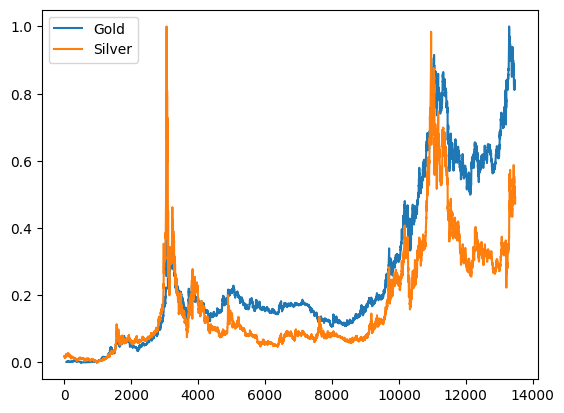

In [707]:
import matplotlib.pyplot as plt

# Get the 'close' column from each DataFrame
gold_prices = df_gold['price']
silver_prices = df_silver['price']

# Compute the minimum and maximum values of the gold and silver prices separately
min_gold_price = gold_prices.min()
max_gold_price = gold_prices.max()
min_silver_price = silver_prices.min()
max_silver_price = silver_prices.max()

# Normalize the gold and silver prices independently
gold_prices_norm = (gold_prices - min_gold_price) / (max_gold_price - min_gold_price)
silver_prices_norm = (silver_prices - min_silver_price) / (max_silver_price - min_silver_price)

# Plot the normalized gold and silver prices
plt.plot(gold_prices_norm, label='Gold')
plt.plot(silver_prices_norm, label='Silver')

# Add a legend
plt.legend()

# Show the plot
plt.show()


datasets from https://www.kaggle.com/datasets/lbronchal/gold-and-silver-prices-dataset